In [5]:
from pylab import *
import matplotlib.pyplot as plt
import random
import numpy as np
from queryParser import *
import psycopg2
from moz_sql_parser import parse
from moz_sql_parser import format



TEMPERATURE =8
TEMP_REDUCTION_FACTOR = 0.5
STEPS_TO_EQUILIBRIUM = 4

def set_temperature(v):
    global TEMPERATURE
    TEMPERATURE=v

def acc_probality(old,new):
    # probality to accept the new state even if new_cost>old_cost
    global TEMPERATURE
    return np.exp( (old - new) /TEMPERATURE )

def is_acceptable(new_cost,old_cost):
    p = random.random()
    if new_cost<old_cost:
        return True
    elif acc_probality(old_cost, new_cost) > p:
        return True
    else:
        return False    
        
def reduce_temperature():
    global TEMPERATURE
    TEMPERATURE *= TEMP_REDUCTION_FACTOR
    
def is_equilibrium():
    global STEPS_TO_EQUILIBRIUM
    if STEPS_TO_EQUILIBRIUM == 0:
        STEPS_TO_EQUILIBRIUM = 4
        return True
    else:
        STEPS_TO_EQUILIBRIUM -= 1
        return False

def is_frozen():
    if TEMPERATURE < 0.1:
        return True
    else:
        return False
     
def simulated_annealing(input,cursor):
    init()
    #variables initialization
 
   
    joinedTables ,parsed_query,alias=queryParser(input)
    joinedTables.remove(FACT)
    
    old_state=get_random_state(joinedTables)
    old_cost=get_cost(listToQuery(old_state,get_indice(old_state),parsed_query),cursor)
    global_min=old_cost
    min_state=()
    
    i=0
    j=0
    
    while not is_frozen() :
        
        while not is_equilibrium():
                print(STEPS_TO_EQUILIBRIUM)
                #get new state and new cost 
                new_state=move(old_state)
                new_cost= get_cost(listToQuery(new_state,get_indice(new_state),parsed_query),cursor)
                #print("new state :",new_state, 'with cost :', new_cost)
          
                if (is_acceptable(new_cost,old_cost)):
                    old_state=new_state
                 #update global_min
                    if new_cost<global_min:
                        global_min=new_cost
                        min_state=(listToQuery(new_state,get_indice(new_state),parsed_query),new_cost)
                        
                    """"if new_cost<local_min:
                        local_min=new_cost
                        j=0
                    else :
                        j+=1
                        if j==1 :
                            locals_min.append((old_state,local_min))
                
                local_min=new_cost"""
        reduce_temperature()
    
    
    
    
    return min_state
    

   
 

   


In [6]:
#Execution
import time 


input="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1;"

conn,cursor = connect_bdd("ssb")


#apply the algorithm
min_state=simulated_annealing(input,cursor)

print('Solution:',min_state, 'with cost ', min_state[1])

print('Postgres Cost: ',get_cost(input,cursor))




jjjjjjjjjjjj {'select': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}, {'value': {'sum': {'sub': ['l.lo_revenue', 'l.lo_supplycost']}}, 'name': 'profit'}], 'from': [{'value': 'part', 'name': 'p'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_partkey', 'p.p_partkey']}}, {'join': {'name': 'c', 'value': 'customer'}, 'on': {'eq': ['l.lo_custkey', 'c.c_custkey']}}, {'join': {'name': 's', 'value': 'supplier'}, 'on': {'eq': ['l.lo_suppkey', 's.s_suppkey']}}, {'join': {'name': 'd', 'value': 'date'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}], 'where': {'and': [{'eq': ['c.c_region', {'literal': 'AMERICA'}]}, {'eq': ['s.s_nation', {'literal': 'UNITED STATES'}]}, {'or': [{'eq': ['d.d_year', 1997]}, {'eq': ['d.d_year', 1998]}]}, {'eq': ['p.p_category', {'literal': 'MFGR#14'}]}]}, 'groupby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}], 'orderby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}]}


{'select': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}, {'value': {'sum': {'sub': ['l.lo_revenue', 'l.lo_supplycost']}}, 'name': 'profit'}], 'from': [{'value': 'date', 'name': 'd'}, {'value': 'customer', 'name': 'c'}, {'value': 'supplier', 'name': 's'}, {'value': 'part', 'name': 'p'}, {'value': 'lineorder', 'name': 'l'}], 'where': {'and': [{'eq': ['l.lo_custkey', 'c.c_custkey']}, {'eq': ['l.lo_suppkey', 's.s_suppkey']}, {'eq': ['l.lo_partkey', 'p.p_partkey']}, {'eq': ['l.lo_orderdate', 'd.d_datekey']}, {'eq': ['c.c_region', {'literal': 'AMERICA'}]}, {'eq': ['s.s_nation', {'literal': 'UNITED STATES'}]}, {'or': [{'eq': ['d.d_year', 1997]}, {'eq': ['d.d_year', 1998]}]}, {'eq': ['p.p_category', {'literal': 'MFGR#14'}]}]}, 'groupby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}], 'orderby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}]}
taaaable aveeeec aliaaas
saaaaans joiiiiin
R ['date', 'customer', 'supplier',

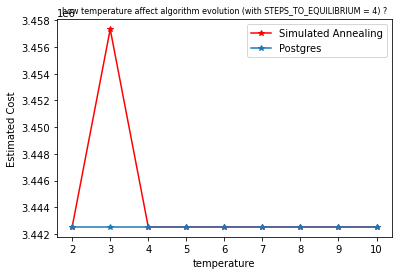

In [2]:
t=2
sa=[]
po=[]
#print("fddqa")
conn,cursor = connect_bdd("ssb")
input="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1;"
R,mode,parsed_query=queryParser(input)

R=delete_fact(R)
print('R',R)


#print("heloooo")
for i in range(1,10):
    init_state=get_random_state(R)
    #print("hiii")
    set_temperature(t)
    #input="SELECT MIN(chn.name) AS voiced_char_name,MIN(n.name) AS voicing_actress_name,MIN(t.title) AS kung_fu_panda FROM aka_name AS an,char_name AS chn,cast_info AS ci,company_name AS cn,info_type AS it,keyword AS k,movie_companies AS mc,movie_info AS mi,movie_keyword AS mk,name AS n,role_type AS rt,title AS t WHERE ci.note IN ('(voice)', '(voice: Japanese version)', '(voice) (uncredited)','(voice: English version)')AND cn.country_code ='[us]'AND cn.name = 'DreamWorks Animation'AND it.info = 'release dates'AND k.keyword IN ('hero','martial-arts','hand-to-hand-combat','computer-animated-movie') AND mi.info IS NOT NULL AND (mi.info LIKE 'Japan:%201%'OR mi.info LIKE 'USA:%201%') AND n.gender ='f' AND n.name LIKE '%An%'  AND rt.role ='actress'  AND t.production_year > 2010  AND t.title LIKE 'Kung Fu Panda%'  AND t.id = mi.movie_id  AND t.id = mc.movie_id  AND t.id = ci.movie_id  AND t.id = mk.movie_id  AND mc.movie_id = ci.movie_id  AND mc.movie_id = mi.movie_id  AND mc.movie_id = mk.movie_id AND mi.movie_id = ci.movie_id AND mi.movie_id = mk.movie_id AND ci.movie_id = mk.movie_id AND cn.id = mc.company_id AND it.id = mi.info_type_id AND n.id = ci.person_id AND rt.id = ci.role_id AND n.id = an.person_id AND ci.person_id = an.person_id AND chn.id = ci.person_role_id AND k.id = mk.keyword_id;"
    min_state,locals_min,costs=simulated_annealing(init_state,mode,parsed_query,cursor)
    print('Solution:',listToQuery(min_state[0],get_indice(min_state[0]),mode,parsed_query), 'with cost ', min_state[1])
    sa.append(min_state[1])
    cost=postgres_cost(input,cursor)
    print('Postgres Cost: ',cost)
    po.append(cost)
    t+=1
    
    
x = array([2,3,4,5,6,7,8,9,10])
y1 = array(sa)
y2=array(po)
plot(x, y1,'r-',label="Simulated Annealing",marker="*")
plot(x,y2,label="Postgres",marker="*")
legend()

plt.title('how temperature affect algorithm evolution (with STEPS_TO_EQUILIBRIUM = 4) ?', fontsize=8)
plt.xlabel("temperature")
plt.ylabel("Estimated Cost")
plt.savefig('SA4.png')
show()
        
disconnect_bdd(conn)  
    

In [3]:
print(min_state)

()


In [3]:
print(costs)

[3721947.21, 3694697.91, 3541691.91, 3446155.83, 3461007.36, 3544643.24, 3442718.39, 3699906.69, 3695992.87, 3695992.87, 3694697.91, 3721947.21, 3694697.91, 3452070.5, 3593407.06, 3541691.91, 3446155.83, 3452070.5, 3446155.83, 3446155.83, 3442718.39, 3699906.69, 3698548.23, 3721169.44, 3698548.23, 3694697.91, 3452070.5, 3593407.06, 3593407.06]
